# PCA Exercises

## What is PCA?

PCA or Principal Component Analysis is a data transformation tecnique for decreasing dimensions or features. This technique is useful for decreasing the complexity of a data set and for visualization.

In visualization, you want to see your data as lines, points, and a point cloud. It is easy to see if it is three dimensions or less. What about four dimesions? Oh no, we cannot show it clearly, so further
decreasing dimensionality might help.

In machine learning, having many features as possible might be useful for accurate modeling accurately. However, it is not every case that too much information could help such as unrelated features, features that are dependent 
on each other, or simply too many features (the curse of dimensionality).


## What happens after PCA?

Main concept of PCA is to find a new axis which can project a lot of data features as much as possible. The new axis is come from those features, so the new data still keep variance of data same as before decreasing dimensions.

![pca](PCA1.png)

Assume you have $n$ set of data with $d$ features which tell you from the smallest thing (such as atom). After using PCA, you will get the $n$ set of data with $k$ features which tell you in group of things.

![pca](PCA2.png)


### Mathematics of PCA

Assume $w$ is a unit vector along the axis
along which the data vary as much as possible, and mean vector $\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$.

\begin{equation}
w_1 = \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu))^2 \\
= \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu)(x^{(i)}-\mu)^Tw) \\
= \text{argmax}_w w^T \color{red}{S}w
\end{equation}

In this case $S$ is the **covariance matrix** of the dataset $\mathtt{X}$.

### Step By Step Computation in PCA

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the principal components
5. Reducing the dimensions of the data set

#### Let's start

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

In [2]:
#Load movie names and movie ratings
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [3]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


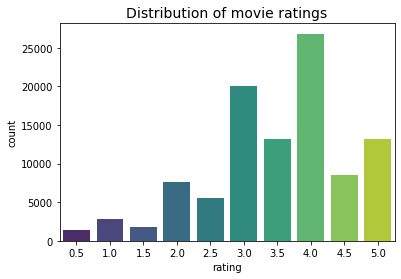

In [4]:
seaborn.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Formatting the data**

In [5]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

### 1) Standardization of the data

Standardization is the way to scale data into same scale. Because some information such as housing price (10,000-100,000 us) and area size (100-1000$m^2$) are not the same scale. It makes impact in one data, but another has lower impact.

Standardization can be calculated in many way. One of the equation is:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}

In [6]:
X_std = StandardScaler().fit_transform(df1)

### 2) Compute the covariance matrix

Covariance matrix is a $p\times p$ matrix where $p$ represents the dimension of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For 2-dimensional dataset with variable $a$ and $b$, the covariance matrix is $2\times 2$ matrix as:

\begin{equation}
S=\begin{bmatrix}
cov(a,a) & cov(a,b) \\ 
cov(b,a) & cov(b,b)
\end{bmatrix} = (x_t-\mu)(x_t-\mu)^T
\end{equation}

We can say that $cov(a,b)=cov(b,a)$.

In [7]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


### 3) Calculating the Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set.

**What are Principal Components?**

Principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

*If dataset of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.*

**Eigenvectors fall into this process**

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components


Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

In [ ]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

**Compute the feature vector**

Rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [10]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544976
487.2206886294059
438.9889489555737
379.04045272530203
324.3162458652458
259.10919628862854
251.67075199496287
226.08065316490553
206.77043202389675
186.08012008011812
180.35681567362803
150.57689826878502
140.5335104255658
135.00425543775694
116.75931121355637
111.22844429826388
105.98588556400021
101.52061108863369
92.38143975955713
87.20146448316912
83.94704525828483
76.51329078142093
73.12943769509823
71.33450019035175
68.66916875072934
68.11563805135025
66.09778445224099
64.79772886519683
64.76738664207988
60.575410168022565
60.09570157695376
58.44406220313088
57.143880762362606
55.70369700851548
55.15327698764694
54.4236166816647
53.623116971407306
49.754253302721125
49.22568958301025
47.7922088933629
46.74358114245121
46.44527988080529
45.33955134746967
45.09994762096554
44.61986596644071
44.25650246763789
43.96138776159127
42.67209649629786
41.73888704520199
41.05033324888547
41.22691039968708
40.02114410412696
39.1981438227531

3.318993277918763e-14
3.3688972084613664e-14
3.3688972084613664e-14
3.3508768377009187e-14
3.3508768377009187e-14
3.2813361817958225e-14
3.2813361817958225e-14
3.3027526394154e-14
3.3027526394154e-14
3.319728630540571e-14
3.3209673997513845e-14
3.404389960729092e-14
3.404389960729092e-14
3.387376565552712e-14
1.9275282906963756e-14
1.9275282906963756e-14
1.9285742437264015e-14
1.9285742437264015e-14
2.0501707718362873e-14
2.0501707718362873e-14
2.7413020545881544e-14
2.7413020545881544e-14
2.872293549357157e-14
2.872293549357157e-14
2.8243507687930524e-14
2.8243507687930524e-14
2.5485159677690286e-14
2.5485159677690286e-14
2.5898950462153122e-14
2.5898950462153122e-14
2.8337230134871684e-14
2.8337230134871684e-14
3.015117298279866e-14
3.015117298279866e-14
3.109688691963164e-14
3.109688691963164e-14
3.1428519160200314e-14
3.1428519160200314e-14
3.0496723639035216e-14
3.0496723639035216e-14
3.021521007696586e-14
3.021521007696586e-14
3.164707217335753e-14
3.164707217335753e-14
2.9789524

1.6531979462992497e-14
1.6531979462992497e-14
1.595582011985436e-14
1.595582011985436e-14
1.6186937568973054e-14
1.6186937568973054e-14
1.595734432450411e-14
1.595734432450411e-14
1.5883108010584412e-14
1.5883108010584412e-14
8.595843303085855e-15
8.595843303085855e-15
1.6270052522325316e-14
1.3015634148637134e-14
1.3015634148637134e-14
1.3463247829301916e-14
1.3463247829301916e-14
1.1911682101390819e-14
1.1911682101390819e-14
1.3149138875570708e-14
1.3149138875570708e-14
1.577372054353375e-14
1.2519023206721537e-14
1.2519023206721537e-14
1.5588306559246482e-14
1.5588306559246482e-14
1.622367897586028e-14
1.622367897586028e-14
1.4371805787474368e-14
1.4371805787474368e-14
1.1844196951717237e-14
1.1844196951717237e-14
1.1948459683560174e-14
1.1948459683560174e-14
1.2671646650626242e-14
1.2671646650626242e-14
1.4990931438695587e-14
1.4990931438695587e-14
1.4587808285168056e-14
1.4587808285168056e-14
1.5048647447826245e-14
1.5048647447826245e-14
1.63080770650342e-14
1.63080770650342e-14
1

1.9708297338750005e-15
1.9708297338750005e-15
1.8847250200470337e-15
1.8847250200470337e-15
1.790720217637356e-15
1.790720217637356e-15
1.9413627241498028e-15
1.9413627241498028e-15
1.8146568575884226e-15
1.8146568575884226e-15
2.140315440976912e-15
2.140315440976912e-15
2.09787490216891e-15
2.09787490216891e-15
2.0268566069401764e-15
2.0268566069401764e-15
2.0318185492453826e-15
2.0318185492453826e-15
1.944512724713049e-15
1.944512724713049e-15
1.8343307952135843e-15
1.8343307952135843e-15
2.072140907627838e-15
1.777616947523096e-15
1.777616947523096e-15
1.8112702253821533e-15
1.8112702253821533e-15
1.7750069482364174e-15
1.8926501441429185e-15
1.8926501441429185e-15
1.889993792404018e-15
1.889993792404018e-15
1.2823475892280936e-15
1.2823475892280936e-15
1.40305357281661e-15
1.40305357281661e-15
1.3396431899799783e-15
1.3396431899799783e-15
1.3992650207363372e-15
1.3992650207363372e-15
1.5822350881394273e-15
1.5822350881394273e-15
1.595312020753937e-15
1.595312020753937e-15
1.2690011

4.957332775360801e-29
5.0093390179573767e-29
5.0093390179573767e-29
4.9510319228925955e-29
4.9510319228925955e-29
4.960131950808393e-29
4.960131950808393e-29
4.911262176036842e-29
4.911262176036842e-29
4.9041941098585e-29
4.9041941098585e-29
4.9327707971168565e-29
4.9327707971168565e-29
4.849552496439985e-29
4.849552496439985e-29
4.8630591142644615e-29
4.8630591142644615e-29
4.8760078954312856e-29
4.8760078954312856e-29
4.8620302041507123e-29
4.8620302041507123e-29
4.8035914870113017e-29
4.8035914870113017e-29
4.808240199922916e-29
4.808240199922916e-29
4.8678747439375464e-29
4.8678747439375464e-29
4.848723683631278e-29
4.848723683631278e-29
4.8302508754383305e-29
4.8302508754383305e-29
4.700273596048208e-29
4.700273596048208e-29
4.6928845155689227e-29
4.6928845155689227e-29
4.759260680021048e-29
4.759260680021048e-29
4.7005789543717124e-29
4.7005789543717124e-29
4.703166249478152e-29
4.703166249478152e-29
4.734620981298128e-29
4.734620981298128e-29
4.67105503220799e-29
4.6710550322079

1.62179045614205e-30
1.62179045614205e-30
1.7637333874850512e-30
1.6887858043361495e-30
1.6887858043361495e-30
1.608515728378463e-30
1.608515728378463e-30
1.5941451739211605e-30
1.5941451739211605e-30
1.5907951375789883e-30
1.5907951375789883e-30
1.582466882780021e-30
1.582466882780021e-30
1.4734442865572313e-30
1.4734442865572313e-30
1.4887079140043424e-30
1.4887079140043424e-30
1.4517113591762538e-30
1.4517113591762538e-30
1.4084929778143288e-30
1.4084929778143288e-30
1.4123518081529588e-30
1.4123518081529588e-30
1.3924790472647408e-30
1.3924790472647408e-30
1.3749854821221253e-30
1.3749854821221253e-30
1.333823245006658e-30
1.3010174654546513e-30
1.3010174654546513e-30
1.3307754107027114e-30
1.3307754107027114e-30
1.347375849216237e-30
1.347375849216237e-30
1.3195609826951016e-30
1.3195609826951016e-30
1.294603888501732e-30
1.294603888501732e-30
1.2644109978354022e-30
1.2644109978354022e-30
1.2308117007044984e-30
1.2308117007044984e-30
1.1742401581058632e-30
1.150699171684292e-30
1.

### 4) Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.

In [13]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


### 5) Reducing the dimensions of the data set

To perform PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

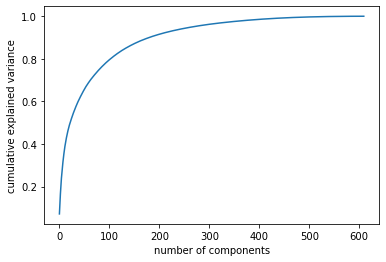

In [14]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()